In [1]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

In [2]:
import pandas as pd
import sklearn as skl
import nltk, re, pprint
from IPython.display import Image

In [3]:
pd.options.display.max_colwidth=100
np.set_printoptions(linewidth=140,edgeitems=10)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
rcParams['figure.figsize'] = (8.0, 5.0)

Information extraction - extract precise relations from text in arbitrary form

Example: text about companies. Learn in what locations each company does its business 
and find all companies, doing business in specified location.

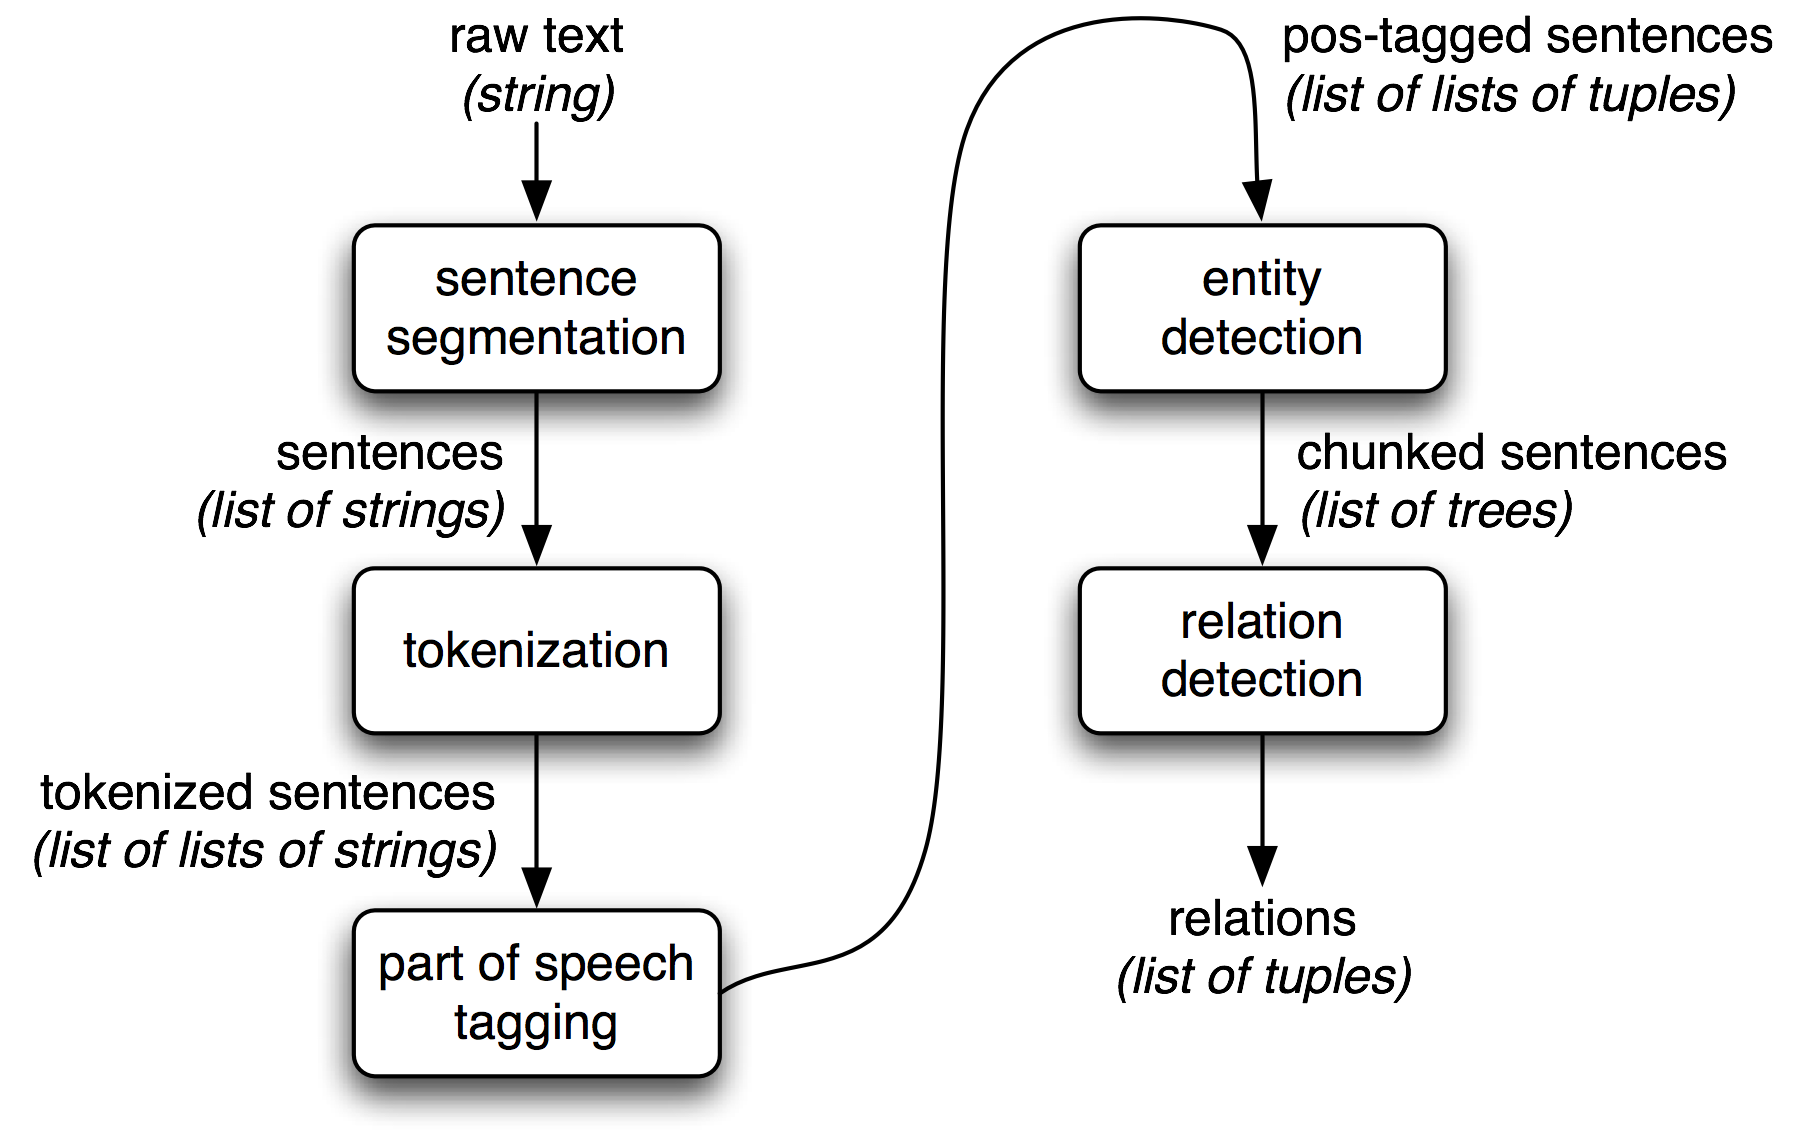

In [4]:
Image(filename="Image/ie-architecture.png", width=500) 

# Noun Phrase Chunking

In [5]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), 
            ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

grammar = "NP: {<DT>?<JJ>*<NN>}"

cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [6]:
result.draw()

In [7]:
def process_sent(sent):
    word_pos_seq=[]
    for elem in sent.split():
        word,pos = elem.split('/')
        word_pos_seq.append((word,pos))
    return word_pos_seq

In [8]:
sent = '''another/DT sharp/JJ dive/NN
trade/NN figures/NNS
any/DT new/JJ policy/NN measures/NNS
earlier/JJR stages/NNS
Panamanian/JJ dictator/NN Manuel/NNP Noriega/NNP'''
sent = process_sent(sent)

In [9]:
result = cp.parse(sent)
result.draw()

In [10]:
# process "earlier stages"
grammar = "NP: {<DT>?<JJ.*>*<NN.*>+}"
cp = nltk.RegexpParser(grammar)

result = cp.parse(sent)
result.draw()

In [11]:
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"),
                 ("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]

In [12]:
print(cp.parse(sentence))

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ golden/JJ hair/NN))


In [14]:
nltk.app.chunkparser()  # {<JJ><NN>}

In [15]:
nouns = [("money", "NN"), ("market", "NN"), ("fund", "NN")]
grammar = "NP: {<NN><NN>}  # Chunk two consecutive nouns"
cp = nltk.RegexpParser(grammar)
print(cp.parse(nouns))

(S (NP money/NN market/NN) fund/NN)


In [16]:
nouns = [("money", "NN"), ("market", "NN"), ("fund", "NN")]
grammar = "NP: {<NN>+}  # Chunk any number of consecutive nouns"
cp = nltk.RegexpParser(grammar)
print(cp.parse(nouns))

(S (NP money/NN market/NN fund/NN))


In [17]:
def show_examples(corpus, grammar):
    cp = nltk.RegexpParser('CHUNK: '+grammar)
    count=0
    
    for sent in corpus.tagged_sents():
        tree = cp.parse(sent)
        for subtree in tree.subtrees():
            if subtree.label() == 'CHUNK': 
                count+=1
                if count>=10:
                    return
                print(subtree)

In [18]:
corpus = nltk.corpus.brown
grammar = '{<V.*> <TO> <V.*>}'
show_examples(corpus, grammar)

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)
(CHUNK serve/VB to/TO protect/VB)
(CHUNK wanted/VBD to/TO wait/VB)
(CHUNK allowed/VBN to/TO place/VB)
(CHUNK expected/VBN to/TO become/VB)
(CHUNK expected/VBN to/TO approve/VB)
(CHUNK expected/VBN to/TO make/VB)
(CHUNK intends/VBZ to/TO make/VB)


In [19]:
corpus = nltk.corpus.brown
grammar = '{<DT><NN>}'
show_examples(corpus, grammar)

(CHUNK this/DT city/NN)
(CHUNK this/DT problem/NN)
(CHUNK this/DT money/NN)
(CHUNK this/DT program/NN)
(CHUNK each/DT county/NN)
(CHUNK this/DT increase/NN)
(CHUNK this/DT county/NN)
(CHUNK this/DT question/NN)
(CHUNK each/DT return/NN)


In [20]:
corpus = nltk.corpus.brown
grammar = '{<JJ><NP>}'
show_examples(corpus, grammar)

(CHUNK rural/JJ Texas/NP)
(CHUNK pro-Communist/JJ Pathet/NP)
(CHUNK historic/JJ Delta/NP)
(CHUNK Incumbent/JJ Richard/NP)
(CHUNK Incumbent/JJ William/NP)
(CHUNK 3-inch/JJ Hansen/NP)
(CHUNK Twenty-one-year-old/JJ Milt/NP)
(CHUNK swift-striding/JJ Jamaican/NP)
(CHUNK nearby/JJ Chardon/NP)


In [21]:
corpus = nltk.corpus.brown
grammar = '{<historic/JJ>}'
show_examples(corpus, grammar)

# Chink - exclude pattern

In [22]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
       ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]
cp = nltk.RegexpParser(grammar)

In [23]:
print(cp.parse(sentence))

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


Tag Representation of Chunk Structures

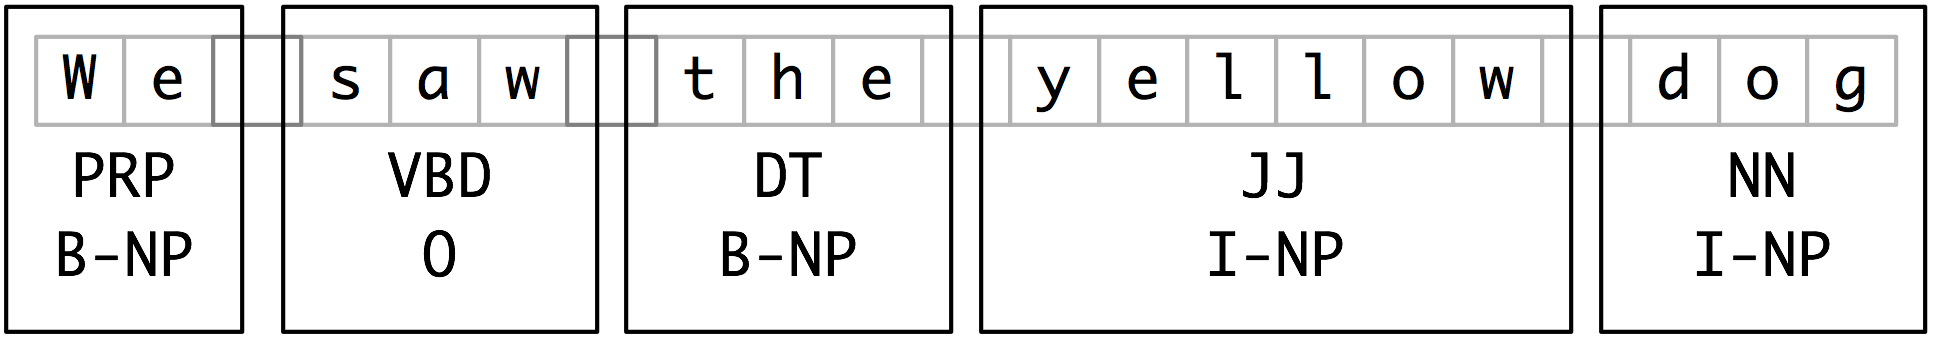

In [24]:
Image(filename='Image/chunk-tagrep.png', width=600)

Tree Representation of Chunk Structures

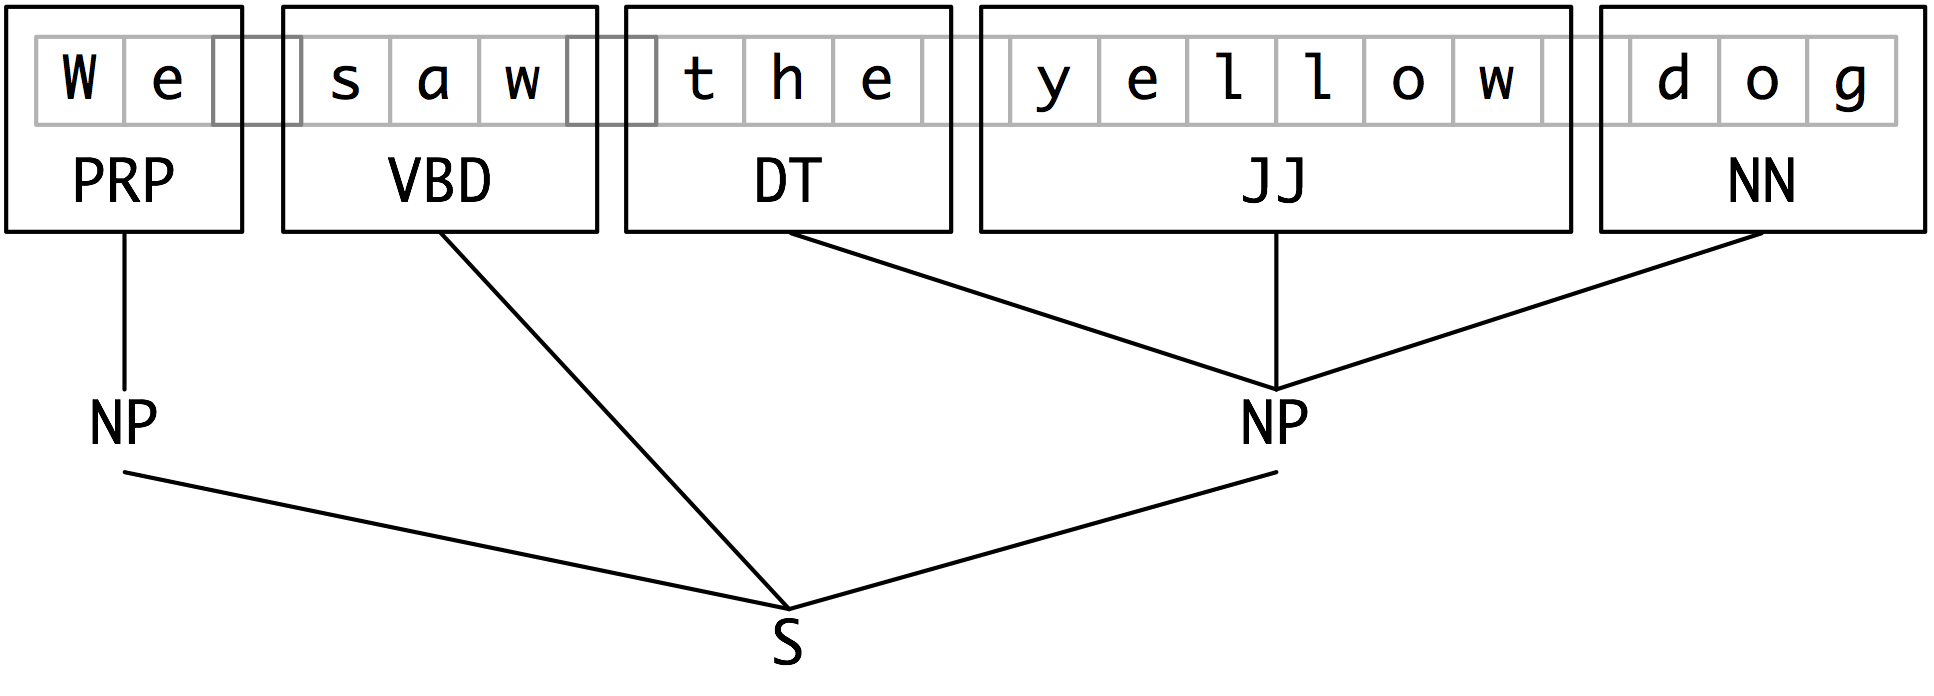

In [25]:
Image(filename='Image/chunk-treerep.png', width=600)

In [26]:
text = '''
he PRP B-NP
accepted VBD B-VP
the DT B-NP
position NN I-NP
of IN B-PP
vice NN B-NP
chairman NN I-NP
of IN B-PP
Carlyle NNP B-NP
Group NNP I-NP
, , O
a DT B-NP
merchant NN I-NP
banking NN I-NP
concern NN I-NP
. . O
'''
nltk.chunk.conllstr2tree(text, chunk_types=['NP']).draw()  # show tree only for NP chunks

In [27]:
from nltk.corpus import conll2000
chunked_set = conll2000.chunked_sents('train.txt')[99]
print(chunked_set)

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


Three types of chunks
* NP
* VP
* PP

In [29]:
print(conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99])  
# show only NP chunks

(S
  Over/IN
  (NP a/DT cup/NN)
  of/IN
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  told/VBD
  (NP his/PRP$ story/NN)
  ./.)


In [30]:
from nltk.corpus import conll2000
cp = nltk.RegexpParser("")  # empty chunker - creates no chunks
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%
    Precision:      0.0%
    Recall:         0.0%
    F-Measure:      0.0%


In [31]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  87.7%
    Precision:     70.6%
    Recall:        67.8%
    F-Measure:     69.2%


In [32]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): 
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data) 

    def parse(self, sentence): 
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [33]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%
    Precision:     79.9%
    Recall:        86.8%
    F-Measure:     83.2%


In [34]:
postags = sorted(set(pos for sent in train_sents
                     for (word,pos) in sent.leaves()))
print(unigram_chunker.tagger.tag(postags))

[('#', 'B-NP'), ('$', 'B-NP'), ("''", 'O'), ('(', 'O'), (')', 'O'), (',', 'O'), ('.', 'O'), (':', 'O'), ('CC', 'O'), ('CD', 'I-NP'), ('DT', 'B-NP'), ('EX', 'B-NP'), ('FW', 'I-NP'), ('IN', 'O'), ('JJ', 'I-NP'), ('JJR', 'B-NP'), ('JJS', 'I-NP'), ('MD', 'O'), ('NN', 'I-NP'), ('NNP', 'I-NP'), ('NNPS', 'I-NP'), ('NNS', 'I-NP'), ('PDT', 'B-NP'), ('POS', 'B-NP'), ('PRP', 'B-NP'), ('PRP$', 'B-NP'), ('RB', 'O'), ('RBR', 'O'), ('RBS', 'B-NP'), ('RP', 'O'), ('SYM', 'O'), ('TO', 'O'), ('UH', 'O'), ('VB', 'O'), ('VBD', 'O'), ('VBG', 'O'), ('VBN', 'O'), ('VBP', 'O'), ('VBZ', 'O'), ('WDT', 'B-NP'), ('WP', 'B-NP'), ('WP$', 'B-NP'), ('WRB', 'O'), ('``', 'O')]


In [35]:
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): 
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.tag.sequential.BigramTagger(train_data) 

    def parse(self, sentence): 
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [36]:
bigram_chunker = BigramChunker(train_sents)
print(bigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  93.3%
    Precision:     82.3%
    Recall:        86.8%
    F-Measure:     84.5%


* can use classifiers for chunking
* can use multi-level chunks